In [1]:
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import pickle
import numpy as np
%matplotlib inline

from sklearn.metrics import roc_curve,roc_auc_score,recall_score,f1_score,precision_score,confusion_matrix
y = np.zeros(25000)
y[:12500] = 1

In [2]:
def plot_scores(rs,fs,ps):
    plt.xticks([0,2,4],['Recall','F','Precision'])
    plt.yticks(np.arange(0.0, 1.0, step=0.1))
    r_square = mlines.Line2D([], [], color='red', marker='o', linestyle='None',
                          markersize=10, label='SVM')
    g_square = mlines.Line2D([], [], color='green', marker='o', linestyle='None',
                          markersize=10, label='NB')
    b_square = mlines.Line2D([], [], color='blue', marker='o', linestyle='None',
                          markersize=10, label='DT')
    y_square = mlines.Line2D([], [], color='yellow', marker='o', linestyle='None',
                          markersize=10, label='RF')
    plt.legend(handles=[r_square, g_square, b_square,y_square])
    plt.scatter([0,0,0,0],rs,c = ['r','g','b','y'])
    plt.scatter([2,2,2,2],fs,c = ['r','g','b','y'])
    plt.scatter([4,4,4,4],ps,c = ['r','g','b','y'])
    
    
def plot_roc_auc(s,n,d,r):
    fpr, tpr, _ = roc_curve(y,s)
    auc_s = roc_auc_score(y,s)
    plt.plot(fpr,tpr)
    fpr, tpr, _ = roc_curve(y,n)
    auc_n = roc_auc_score(y,n)
    plt.plot(fpr,tpr)
    fpr, tpr, _ = roc_curve(y,d)
    auc_d = roc_auc_score(y,d)
    plt.plot(fpr,tpr)
    fpr, tpr, _ = roc_curve(y,r)
    auc_r = roc_auc_score(y,r)
    plt.plot(fpr,tpr)
    plt.xticks(np.arange(0.0, 1.0, step=0.1))
    plt.xlabel("Flase Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.yticks(np.arange(0.0, 1.1, step=0.1))
    plt.legend(prop={'size':13}, loc='lower right')
    a = "SVM  with auc: %.3f"%(roc_auc_score(y,s))
    b = "NB    with auc: %.3f"%(roc_auc_score(y,n))
    c = "DT    with auc: %.3f"%(roc_auc_score(y,d))
    d = "RF    with auc: %.3f"%(roc_auc_score(y,r))
    plt.legend([a,b,c,d])
    
    
def plot_confusion_mat(cm,s):
    plt.imshow(cm,cmap = plt.get_cmap('Blues'))
    plt.colorbar()
    #plt.axis('off')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    t = s + '  Confusion Matrix'
    plt.title(t)
    plt.text(0, 0,"TP \n\n %d"%(cm[0, 0]),
                     horizontalalignment="center",
                     color="white" if cm[0, 0] > cm.max() / 1.5 else "black")
    plt.text(1, 0,"FN \n\n%d"%(cm[0, 1]),
                     horizontalalignment="center",
                     color="white" if cm[0, 1] > cm.max() / 1.5 else "black")
    plt.text(0, 1,"FP \n\n%d"%(cm[1, 0]),
                     horizontalalignment="center",
                     color="white" if cm[1, 0] > cm.max() / 1.5 else "black")
    plt.text(1, 1,"TN \n\n%d"%(cm[1, 1]),
                     horizontalalignment="center",
                     color="white" if cm[1, 1] > cm.max() / 1.5 else "black")

# BOW


No handles with labels found to put in legend.


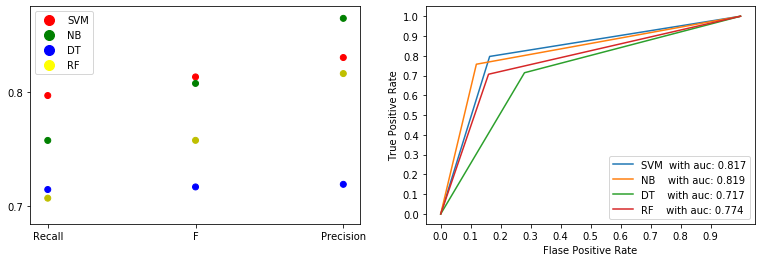

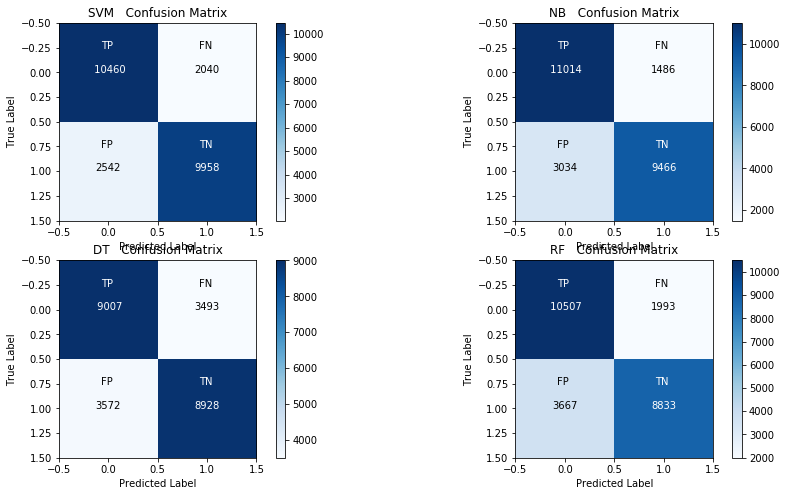

In [3]:
with open('ypred/svm/y_pred_BOW','rb') as f:
    s1 = pickle.load(f)
with open('ypred/nb/y_pred_BOW','rb') as f:
    n1 = pickle.load(f)
with open('ypred/dt/y_pred_BOW','rb') as f:
    d1 = pickle.load(f)
with open('ypred/rf/y_pred_BOW','rb') as f:
    r1 = pickle.load(f)
    
rs1 = [recall_score(y,s1),recall_score(y,n1),recall_score(y,d1),recall_score(y,r1)]
fs1 = [f1_score(y,s1),f1_score(y,n1),f1_score(y,d1),f1_score(y,r1)]
ps1 = [precision_score(y,s1),precision_score(y,n1),precision_score(y,d1),precision_score(y,r1)]

f = plt.figure(figsize=(13,4))
f.add_subplot(121)
plot_scores(rs1,fs1,ps1)
f.add_subplot(122)
plot_roc_auc(s1,n1,d1,r1)

f = plt.figure(figsize=(15,8))
f.add_subplot(221)
plot_confusion_mat(confusion_matrix(y,s1),'SVM ')
f.add_subplot(222)
plot_confusion_mat(confusion_matrix(y,n1),'NB ')
f.add_subplot(223)
plot_confusion_mat(confusion_matrix(y,d1),'DT ')
f.add_subplot(224)
plot_confusion_mat(confusion_matrix(y,r1),'RF ')

# BERT SENTENCE 

No handles with labels found to put in legend.


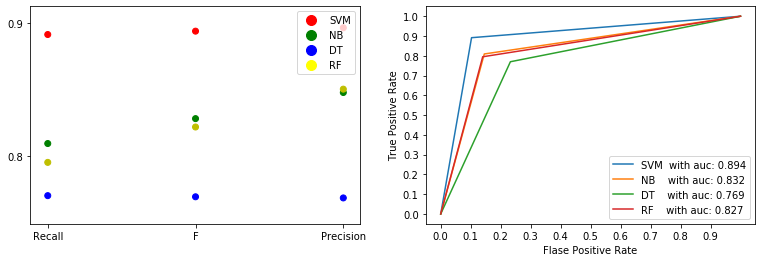

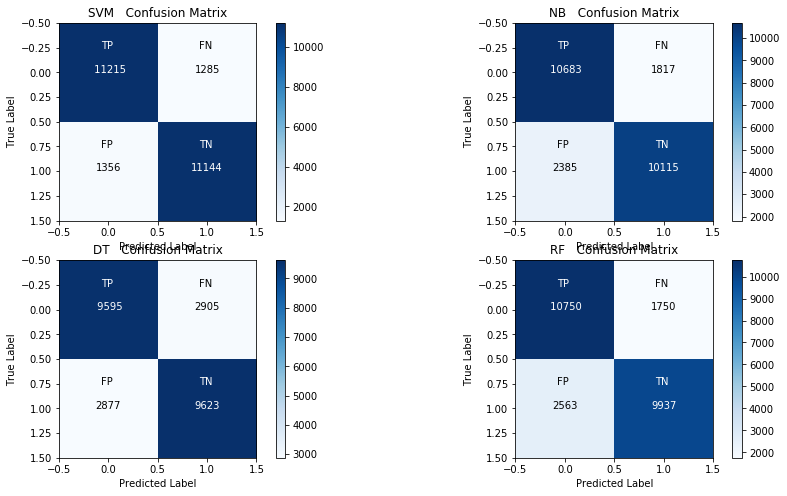

In [4]:
with open('ypred/svm/y_pred_bertS','rb') as f:
    s2 = pickle.load(f)
with open('ypred/nb/y_pred_bertS','rb') as f:
    n2 = pickle.load(f)
with open('ypred/dt/y_pred_bertS','rb') as f:
    d2 = pickle.load(f)
with open('ypred/rf/y_pred_bertS','rb') as f:
    r2 = pickle.load(f)

rs2 = [recall_score(y,s2),recall_score(y,n2),recall_score(y,d2),recall_score(y,r2)]
fs2 = [f1_score(y,s2),f1_score(y,n2),f1_score(y,d2),f1_score(y,r2)]
ps2 = [precision_score(y,s2),precision_score(y,n2),precision_score(y,d2),precision_score(y,r2)]

f = plt.figure(figsize=(13,4))
f.add_subplot(121)
plot_scores(rs2,fs2,ps2)
f.add_subplot(122)
plot_roc_auc(s2,n2,d2,r2)

f = plt.figure(figsize=(15,8))
f.add_subplot(221)
plot_confusion_mat(confusion_matrix(y,s2),'SVM ')
f.add_subplot(222)
plot_confusion_mat(confusion_matrix(y,n2),'NB ')
f.add_subplot(223)
plot_confusion_mat(confusion_matrix(y,d2),'DT ')
f.add_subplot(224)
plot_confusion_mat(confusion_matrix(y,r2),'RF ')

# BERT TOKEN

No handles with labels found to put in legend.


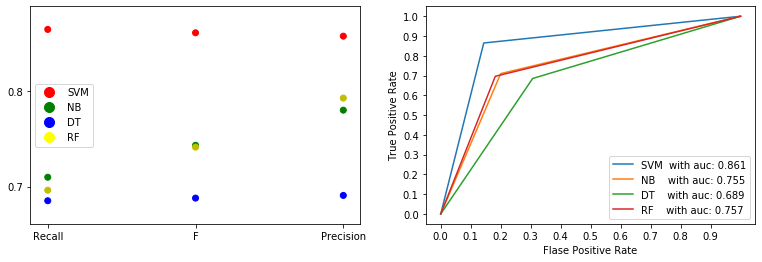

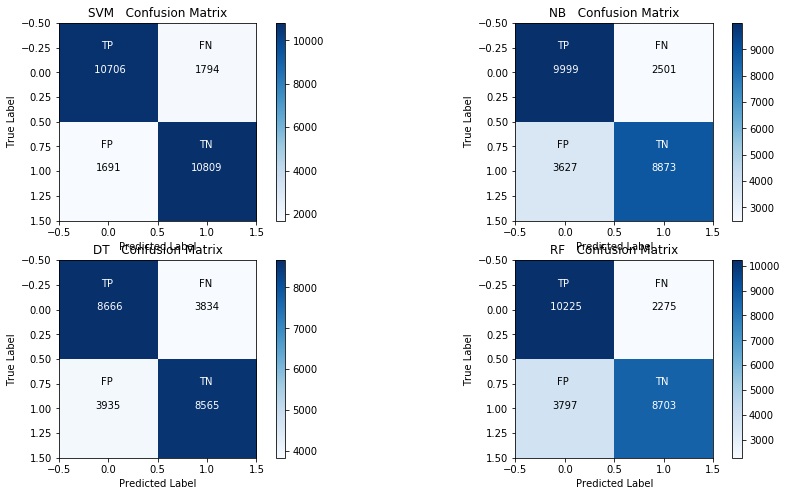

In [5]:
with open('ypred/svm/y_pred_bertT','rb') as f:
    s3 = pickle.load(f)
with open('ypred/nb/y_pred_bertT','rb') as f:
    n3 = pickle.load(f)
with open('ypred/dt/y_pred_bertT','rb') as f:
    d3 = pickle.load(f)
with open('ypred/rf/y_pred_bertT','rb') as f:
    r3 = pickle.load(f)
    
rs3 = [recall_score(y,s3),recall_score(y,n3),recall_score(y,d3),recall_score(y,r3)]
fs3 = [f1_score(y,s3),f1_score(y,n3),f1_score(y,d3),f1_score(y,r3)]
ps3 = [precision_score(y,s3),precision_score(y,n3),precision_score(y,d3),precision_score(y,r3)]

f = plt.figure(figsize=(13,4))
f.add_subplot(121)
plot_scores(rs3,fs3,ps3)
f.add_subplot(122)
plot_roc_auc(s3,n3,d3,r3)

f = plt.figure(figsize=(15,8))
f.add_subplot(221)
plot_confusion_mat(confusion_matrix(y,s3),'SVM ')
f.add_subplot(222)
plot_confusion_mat(confusion_matrix(y,n3),'NB ')
f.add_subplot(223)
plot_confusion_mat(confusion_matrix(y,d3),'DT ')
f.add_subplot(224)
plot_confusion_mat(confusion_matrix(y,r3),'RF ')

# TFIDF

No handles with labels found to put in legend.


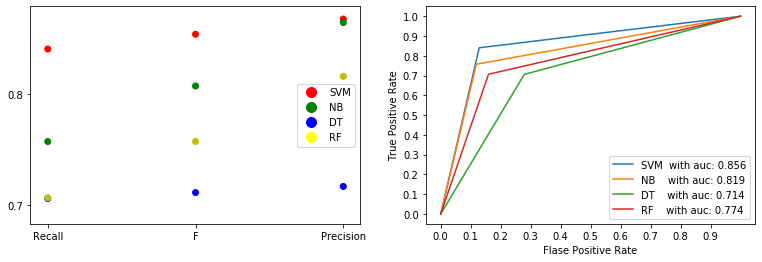

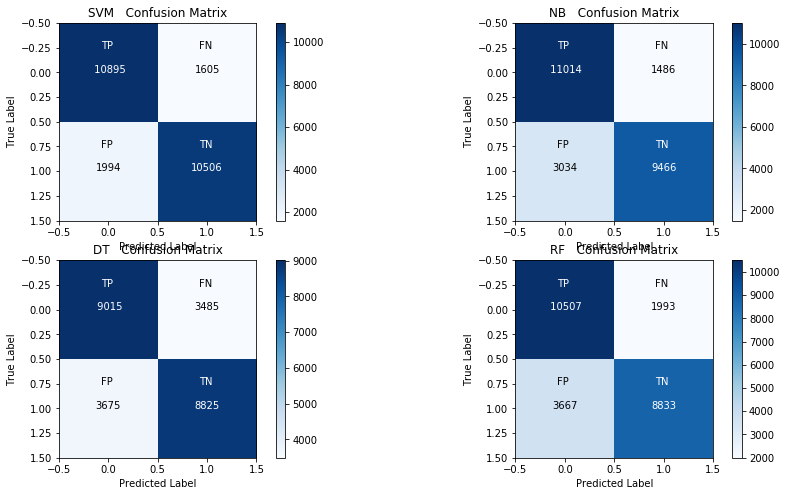

In [6]:
with open('ypred/svm/y_pred_TFIDF','rb') as f:
    s4 = pickle.load(f)
with open('ypred/nb/y_pred_TFIDF','rb') as f:
    n4 = pickle.load(f)
with open('ypred/dt/y_pred_TFIDF','rb') as f:
    d4 = pickle.load(f)
with open('ypred/rf/y_pred_TFIDF','rb') as f:
    r4 = pickle.load(f)
rs4 = [recall_score(y,s4),recall_score(y,n4),recall_score(y,d4),recall_score(y,r4)]
fs4 = [f1_score(y,s4),f1_score(y,n4),f1_score(y,d4),f1_score(y,r4)]
ps4 = [precision_score(y,s4),precision_score(y,n4),precision_score(y,d4),precision_score(y,r4)]

f = plt.figure(figsize=(13,4))
f.add_subplot(121)
plot_scores(rs4,fs4,ps4)
f.add_subplot(122)
plot_roc_auc(s4,n4,d4,r4)

f = plt.figure(figsize=(15,8))
f.add_subplot(221)
plot_confusion_mat(confusion_matrix(y,s4),'SVM ')
f.add_subplot(222)
plot_confusion_mat(confusion_matrix(y,n4),'NB ')
f.add_subplot(223)
plot_confusion_mat(confusion_matrix(y,d4),'DT ')
f.add_subplot(224)
plot_confusion_mat(confusion_matrix(y,r4),'RF ')

# TFIDF_SW

No handles with labels found to put in legend.


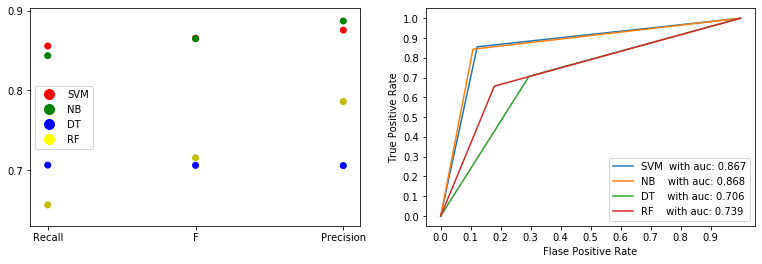

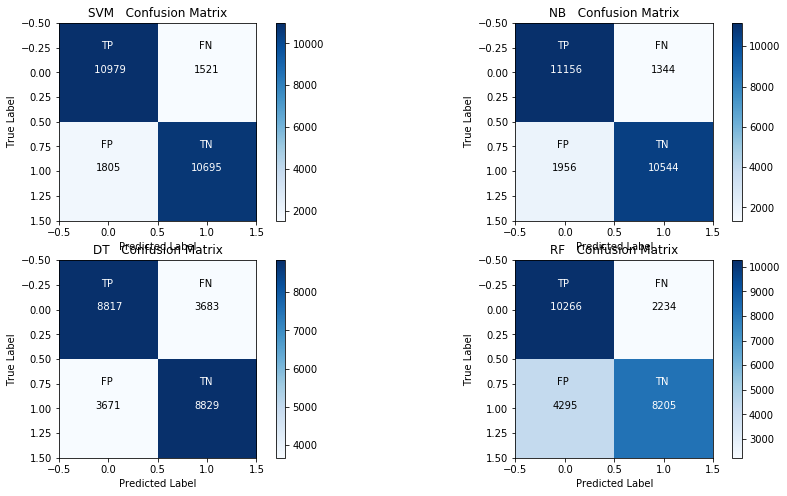

In [7]:
with open('ypred/svm/y_pred_TFIDF_sw','rb') as f:
    s5 = pickle.load(f)
with open('ypred/nb/y_pred_TFIDF_sw','rb') as f:
    n5 = pickle.load(f)
with open('ypred/dt/y_pred_TFIDF_sw','rb') as f:
    d5 = pickle.load(f)
with open('ypred/rf/y_pred_TFIDF_sw','rb') as f:
    r5 = pickle.load(f)

rs5 = [recall_score(y,s5),recall_score(y,n5),recall_score(y,d5),recall_score(y,r5)]
fs5 = [f1_score(y,s5),f1_score(y,n5),f1_score(y,d5),f1_score(y,r5)]
ps5 = [precision_score(y,s5),precision_score(y,n5),precision_score(y,d5),precision_score(y,r5)]

f = plt.figure(figsize=(13,4))
f.add_subplot(121)
plot_scores(rs5,fs5,ps5)
f.add_subplot(122)
plot_roc_auc(s5,n5,d5,r5)

f = plt.figure(figsize=(15,8))
f.add_subplot(221)
plot_confusion_mat(confusion_matrix(y,s5),'SVM ')
f.add_subplot(222)
plot_confusion_mat(confusion_matrix(y,n5),'NB ')
f.add_subplot(223)
plot_confusion_mat(confusion_matrix(y,d5),'DT ')
f.add_subplot(224)
plot_confusion_mat(confusion_matrix(y,r5),'RF ')


# WORD2VEC

No handles with labels found to put in legend.


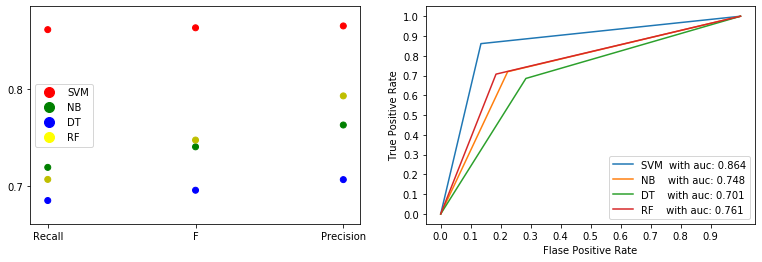

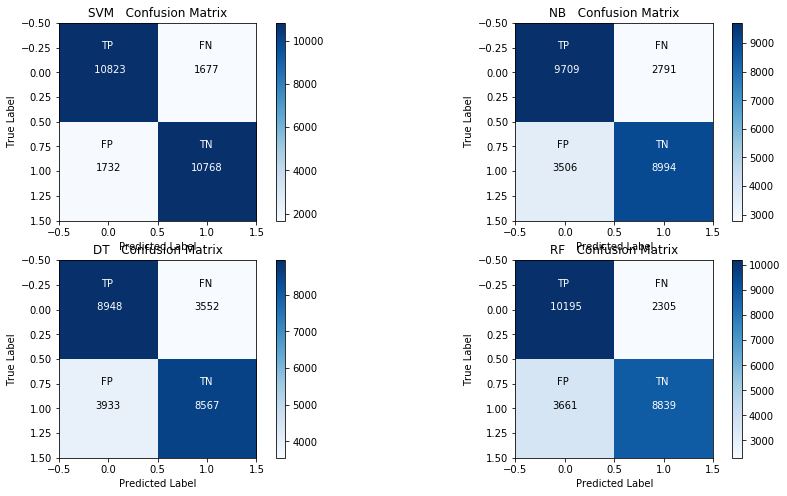

In [8]:
with open('ypred/svm/y_pred_W2V','rb') as f:
    s6 = pickle.load(f)
with open('ypred/nb/y_pred_W2V','rb') as f:
    n6 = pickle.load(f)
with open('ypred/dt/y_pred_W2V','rb') as f:
    d6 = pickle.load(f)
with open('ypred/rf/y_pred_W2V','rb') as f:
    r6 = pickle.load(f)

rs6 = [recall_score(y,s6),recall_score(y,n6),recall_score(y,d6),recall_score(y,r6)]
fs6 = [f1_score(y,s6),f1_score(y,n6),f1_score(y,d6),f1_score(y,r6)]
ps6 = [precision_score(y,s6),precision_score(y,n6),precision_score(y,d6),precision_score(y,r6)]

f = plt.figure(figsize=(13,4))
f.add_subplot(121)
plot_scores(rs6,fs6,ps6)
f.add_subplot(122)
plot_roc_auc(s6,n6,d6,r6)

f = plt.figure(figsize=(15,8))
f.add_subplot(221)
plot_confusion_mat(confusion_matrix(y,s6),'SVM ')
f.add_subplot(222)
plot_confusion_mat(confusion_matrix(y,n6),'NB ')
f.add_subplot(223)
plot_confusion_mat(confusion_matrix(y,d6),'DT ')
f.add_subplot(224)
plot_confusion_mat(confusion_matrix(y,r6),'RF ')

# WORD2VEC_SW

No handles with labels found to put in legend.


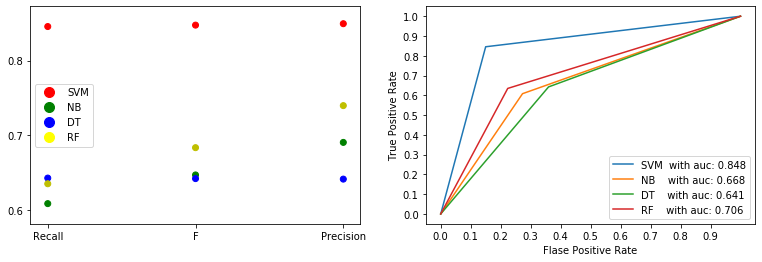

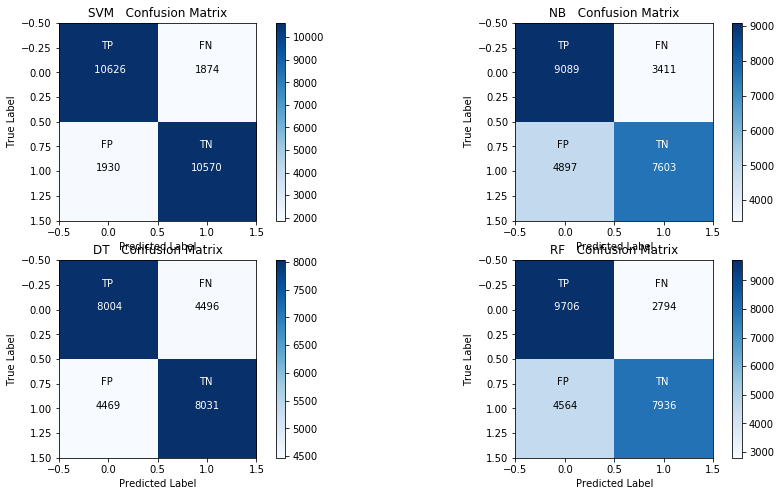

In [9]:
with open('ypred/svm/y_pred_W2V_sw','rb') as f:
    s7 = pickle.load(f)
with open('ypred/nb/y_pred_W2V_sw','rb') as f:
    n7 = pickle.load(f)
with open('ypred/dt/y_pred_W2V_sw','rb') as f:
    d7 = pickle.load(f)
with open('ypred/rf/y_pred_W2V_sw','rb') as f:
    r7 = pickle.load(f)

rs7 = [recall_score(y,s7),recall_score(y,n7),recall_score(y,d7),recall_score(y,r7)]
fs7 = [f1_score(y,s7),f1_score(y,n7),f1_score(y,d7),f1_score(y,r7)]
ps7 = [precision_score(y,s7),precision_score(y,n7),precision_score(y,d7),precision_score(y,r7)]

f = plt.figure(figsize=(13,4))
f.add_subplot(121)
plot_scores(rs7,fs7,ps7)
f.add_subplot(122)
plot_roc_auc(s7,n7,d7,r7)

f = plt.figure(figsize=(15,8))
f.add_subplot(221)
plot_confusion_mat(confusion_matrix(y,s7),'SVM ')
f.add_subplot(222)
plot_confusion_mat(confusion_matrix(y,n7),'NB ')
f.add_subplot(223)
plot_confusion_mat(confusion_matrix(y,d7),'DT ')
f.add_subplot(224)
plot_confusion_mat(confusion_matrix(y,r7),'RF ')

[0.79664, 0.75728, 0.71424, 0.70664]


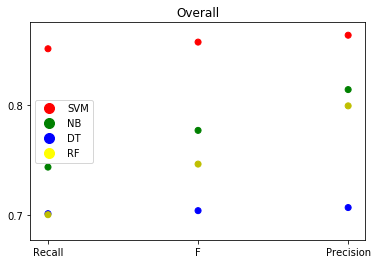

In [10]:
print(rs1)
rs_avg = (np.array(rs1)+np.array(rs2)+np.array(rs3)+np.array(rs4)+np.array(rs5)+np.array(rs6)+np.array(rs7))/7
fs_avg = (np.array(fs1)+np.array(fs2)+np.array(fs3)+np.array(fs4)+np.array(fs5)+np.array(fs6)+np.array(fs7))/7
ps_avg = (np.array(ps1)+np.array(ps2)+np.array(ps3)+np.array(ps4)+np.array(ps5)+np.array(ps6)+np.array(ps7))/7
plt.subplot(111)
plt.title('Overall')
plot_scores(rs_avg,fs_avg,ps_avg)